# HomeWork 2

**DeadLine : 12:00 PM 14 Mehr 1399**

**Total points : 100pts**

Import some prerequisites

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

Run this cell for plotting

In [2]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if gray:
            plt.imshow(img_list[i][0], cmap = 'gray')
        else:
            plt.imshow(img_list[i][0])
        plt.title(img_list[i][1])
        plt.xticks([])
        plt.yticks([])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

Run this cell is for histogram visualization

In [3]:
def show_histogram(histogram, title, fig_name):
    '''
    Plots histogram with it's caption and saves result image.

    Parameters:
        histogram (numpy.ndarray): The numpy array of numbers in histogram.
        title (str): The title of the plot.
        fig_name (str): The name of the image of the plot.
    '''
    
    plt.figure()
    plt.bar(np.arange(256),histogram,color = 'c')
    plt.title(title)
    plt.savefig(fig_name + '.png')
    plt.show()

# PART 3A

Here is for your helper functions(optional)

in this cell you should calculate histogram. don't use opencv methods here

In [4]:
def compute_histogram(image):
    '''
    Computes histogram of the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The numpy array of numbers in histogram.   
    '''
    
    histogram = np.zeros((256), np.int)
    
    ####### your code ########
    
    rows,cols = image.shape
    for row in range(0, rows):
        for col in range(0, cols):
            histogram[image[row, col]] += 1
#     print(histogram)
    
    ##########################
    
    return histogram

Test your implementation (dont change this cell)

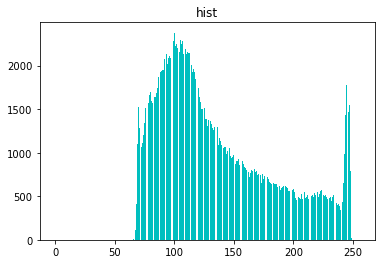

In [5]:
img = cv2.imread(os.path.join('images', 'img1.jpg'), cv2.IMREAD_GRAYSCALE)
h = compute_histogram(img)
show_histogram(h, 'hist', 'q3a')

# PART 3B

Here is for your helper functions(optional)

in this cell you should implement histogram visualization. please don't use opencv methods

In [6]:
def histogram_equalization(image):
    '''
    Equalizes the histogram of the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image that it's histogram be eqaulized.   
    '''
    
    h = compute_histogram(image)
    out_image = image.copy()

    ####### your code ########
    
    n = sum(h) 
    L = len(h)
    
    equalized = np.array(h.copy(), dtype=float)
    
    for i in range(1, L):
        equalized[i] += equalized[i-1]
    
    for i in range (0, L):
        equalized[i] /= n
        equalized[i] *= (L - 1)
        equalized[i] = round(equalized[i])

    rows,cols = image.shape
    for row in range(0, rows):
        for col in range(0, cols):
            out_image[row][col] = equalized[image[row][col]]
    ##########################
        
    return out_image  

Test your implementation (dont change this cell)

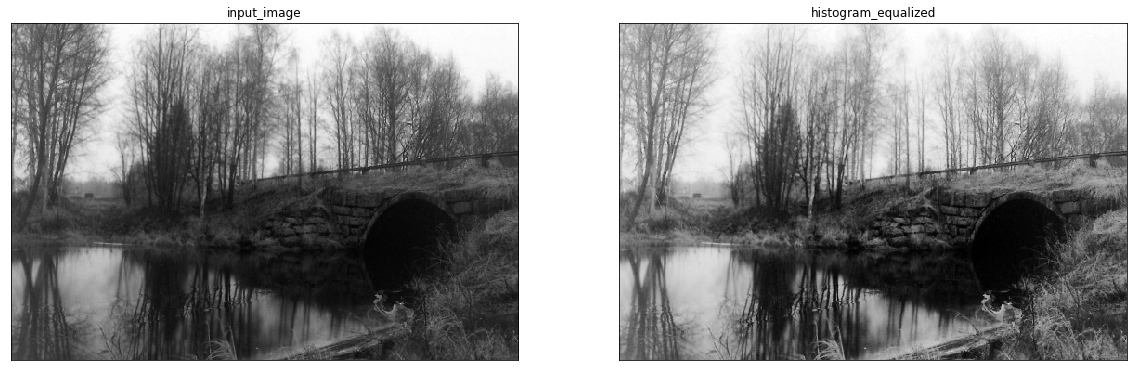

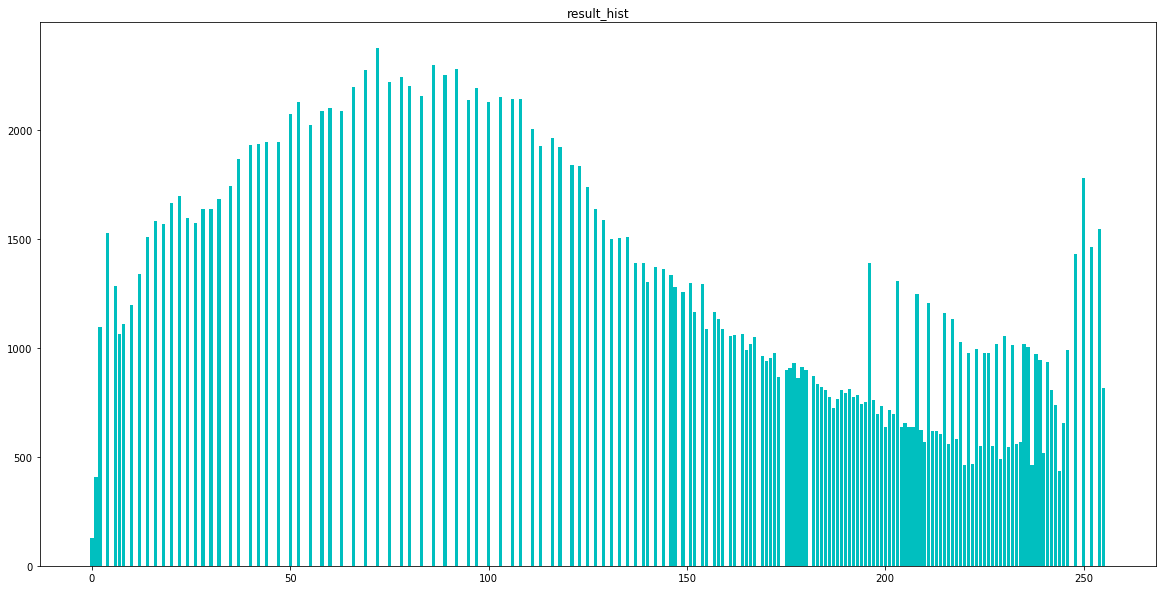

In [7]:
img = cv2.imread(os.path.join('images', 'img1.jpg'), cv2.IMREAD_GRAYSCALE)
out = histogram_equalization(img)
image_list = []
image_list.append([img, 'input_image'])
image_list.append([out, 'histogram_equalized'])
plotter(image_list, 1, 2, True, 20, 10, 'q3b-1')
h2 = compute_histogram(out)
show_histogram(h2, 'result_hist', 'q3b-2')

# PART 3C

Here is for your helper functions(optional)

in this cell you should implement histogram stretching. please don't use opencv methods

In [8]:
def histogram_stretching(image):
    '''
    Streches the histogram of the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image that it's histogram be streched.   
    '''
    
    h = compute_histogram(image)
    out_image = image.copy()

    ####### your code ########
    fmin = np.min(image)
    fmax = np.max(image)
    print(fmin, fmax)
    
    rows,cols = image.shape
    for row in range(0, rows):
        for col in range(0, cols):
            out_image[row][col] = (out_image[row][col] - fmin) / (fmax - fmin) * 256
    
    ##########################
    
    return out_image

Test your implementation (dont change this cell)

64 249


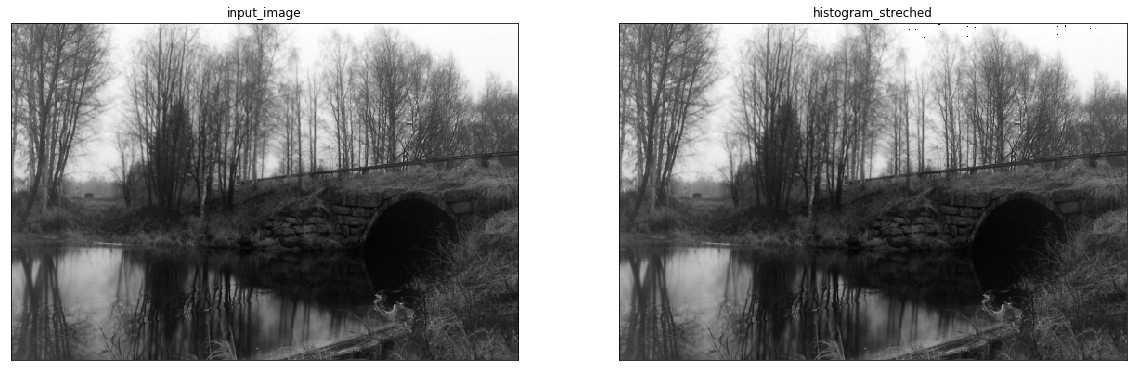

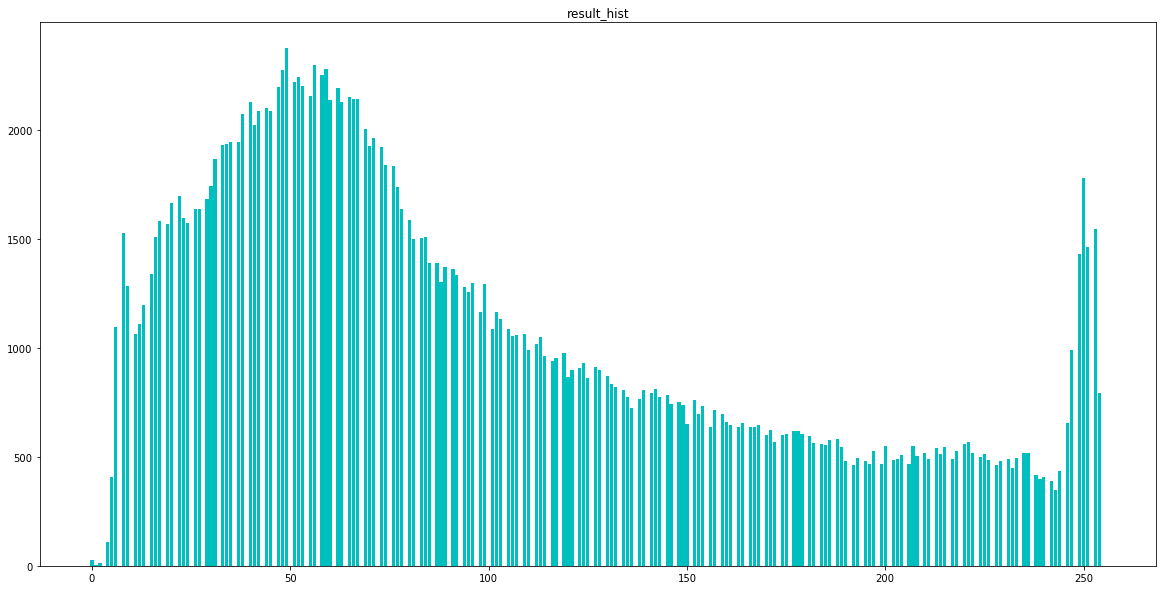

In [9]:
img = cv2.imread(os.path.join('images', 'img1.jpg'), cv2.IMREAD_GRAYSCALE)
out = histogram_stretching(img)
image_list = []
image_list.append([img, 'input_image'])
image_list.append([out, 'histogram_streched'])
plotter(image_list, 1, 2, True, 20, 10, 'q3c-1')
h2 = compute_histogram(out)
show_histogram(h2, 'result_hist', 'q3c-2')

# PART 3D

Test your implementation (dont change this cell)

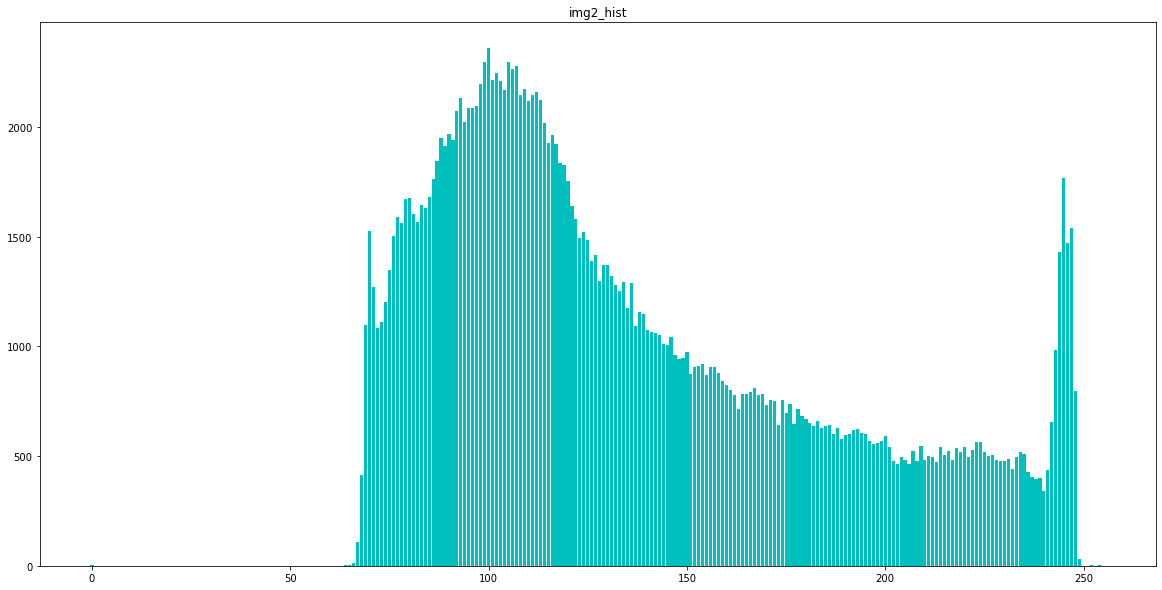

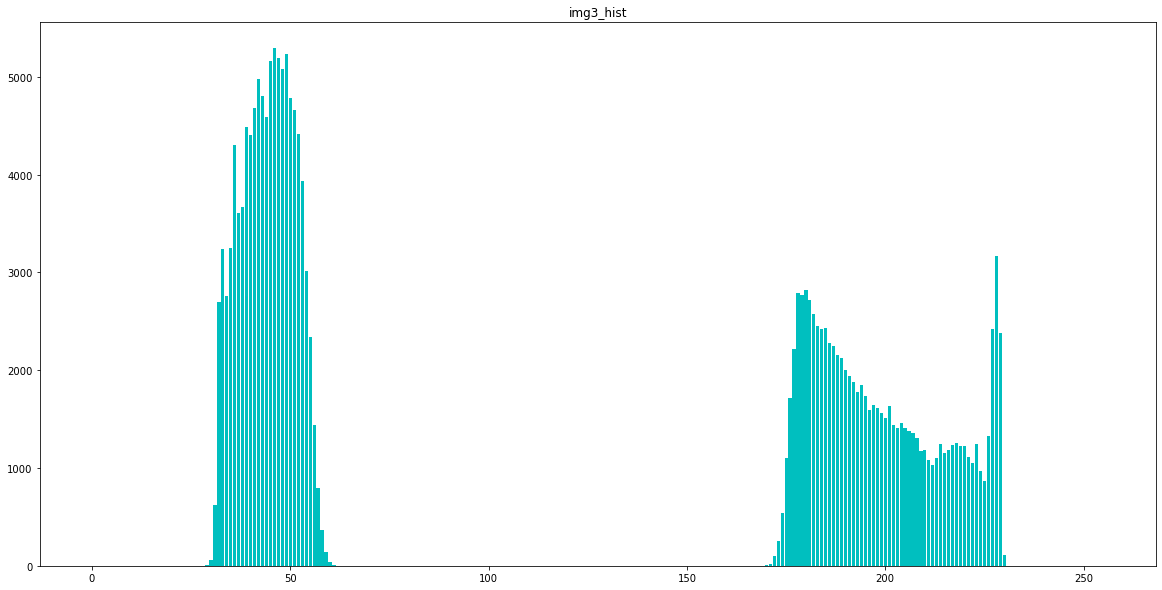

0 255
28 231


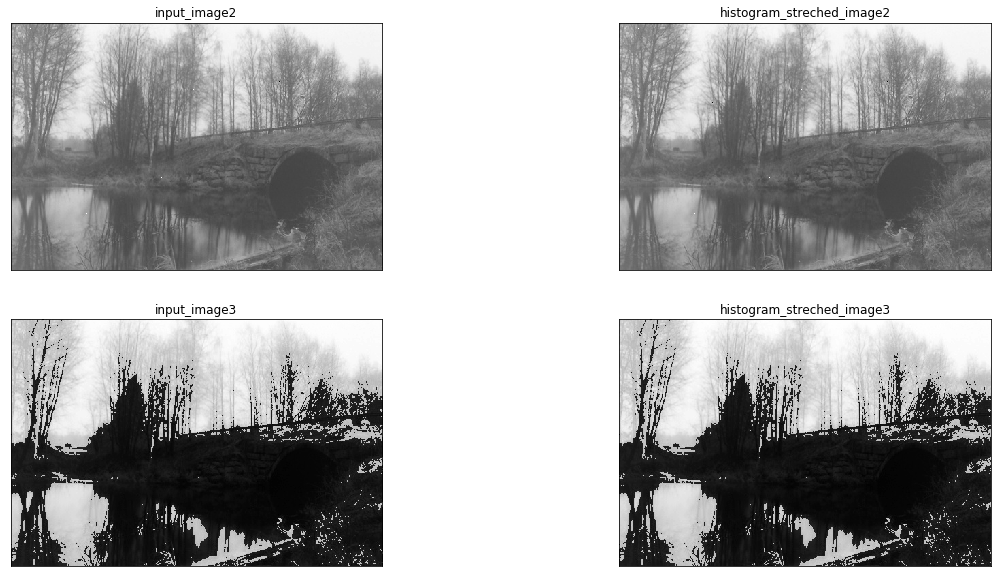

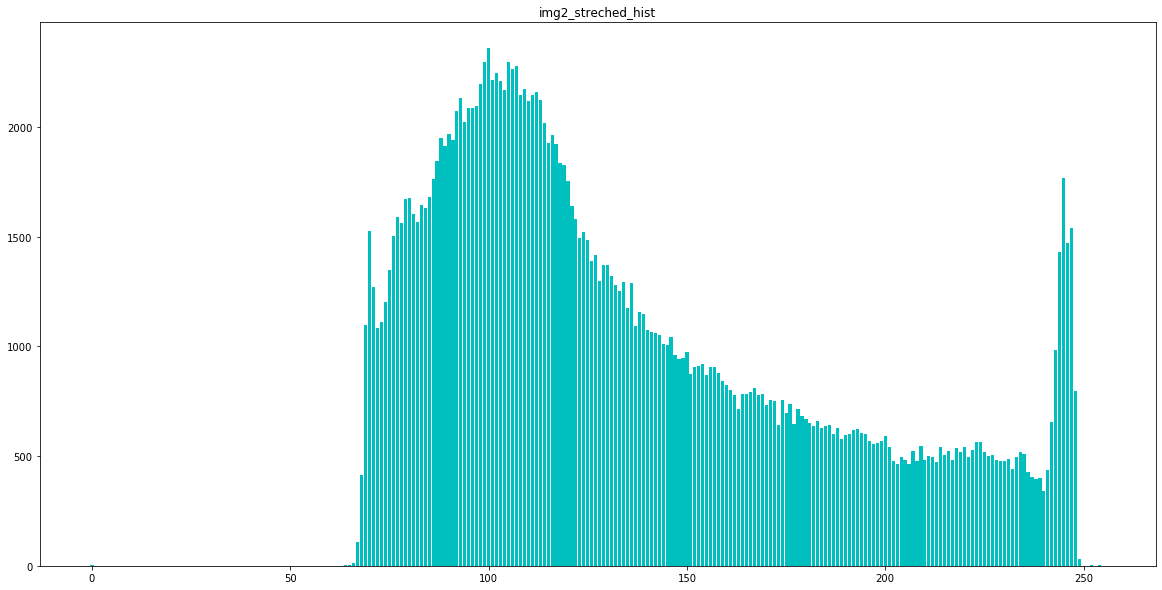

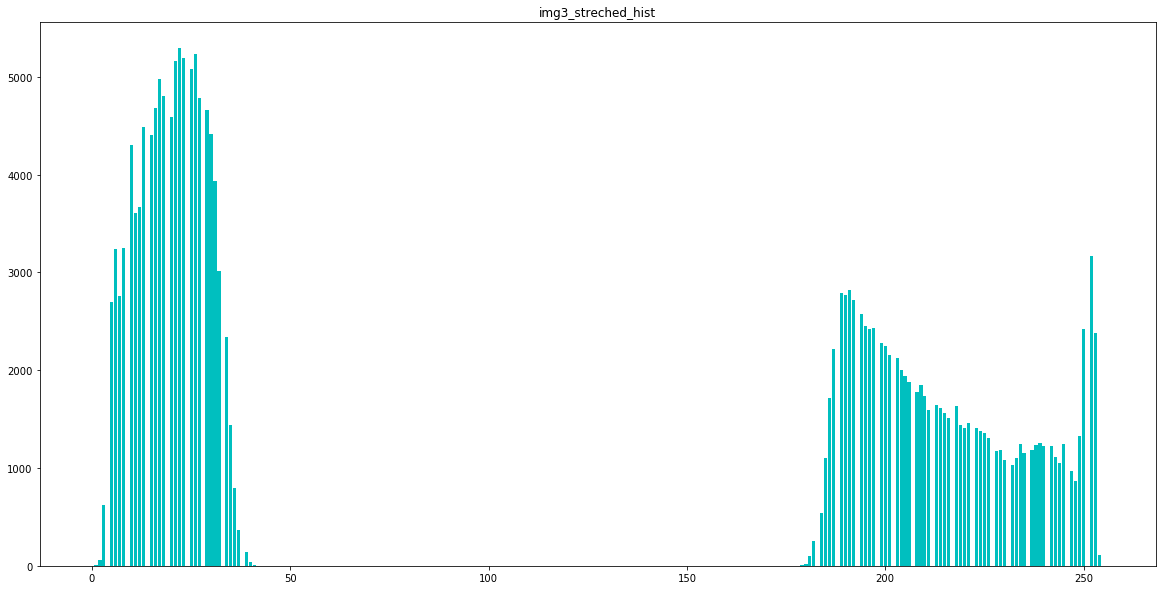

In [10]:
img2 = cv2.imread(os.path.join('images', 'img2.jpg'), cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread(os.path.join('images', 'img3.jpg'), cv2.IMREAD_GRAYSCALE)
h2 = compute_histogram(img2)
show_histogram(h2, 'img2_hist', 'q3d_img2_hist')
h3 = compute_histogram(img3)
show_histogram(h3, 'img3_hist', 'q3d_img3_hist')
out2 = histogram_stretching(img2)
out3 = histogram_stretching(img3)
image_list = []
image_list.append([img2, 'input_image2'])
image_list.append([out2, 'histogram_streched_image2'])
image_list.append([img3, 'input_image3'])
image_list.append([out3, 'histogram_streched_image3'])
plotter(image_list, 2, 2, True, 20, 10, 'q3d')
h2_res = compute_histogram(out2)
show_histogram(h2_res, 'img2_streched_hist', 'q3d_img2_streched_hist')
h3_res = compute_histogram(out3)
show_histogram(h3_res, 'img3_streched_hist', 'q3d_img3_streched_hist')

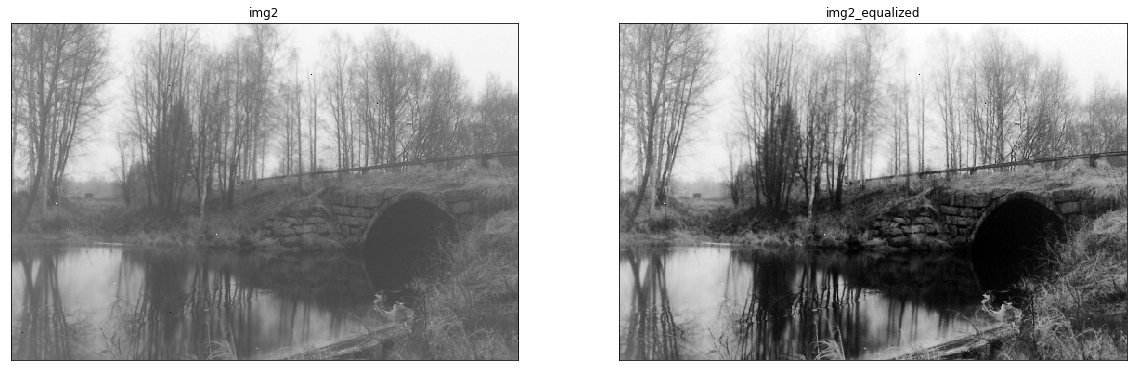

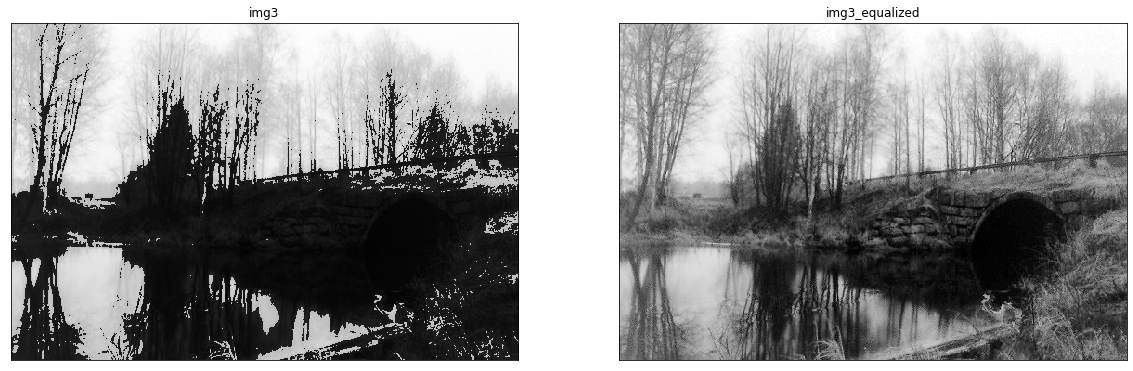

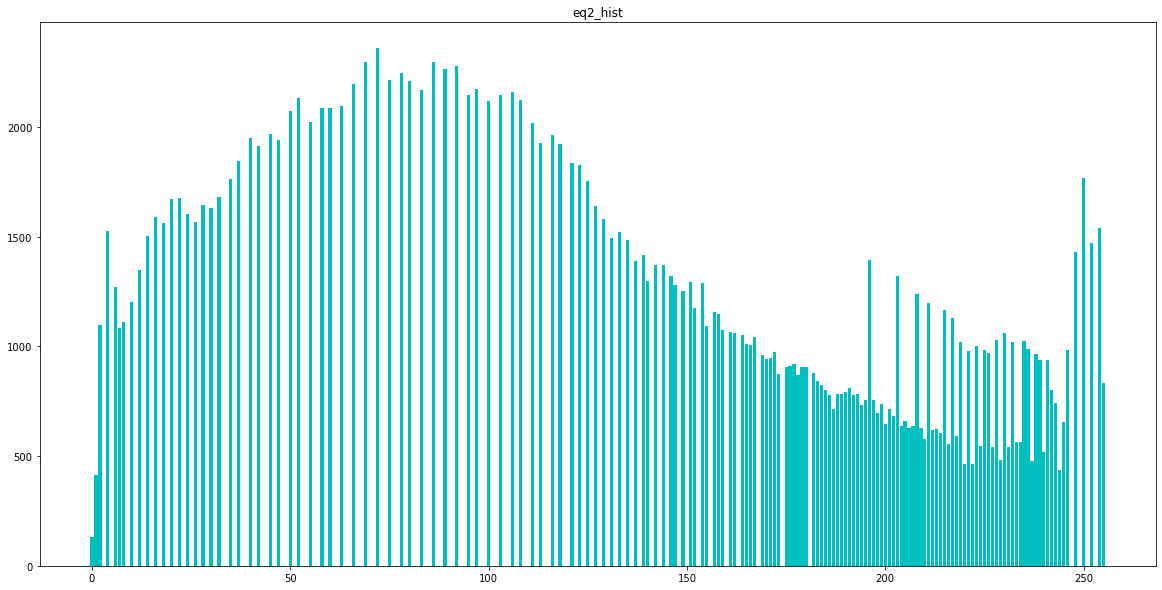

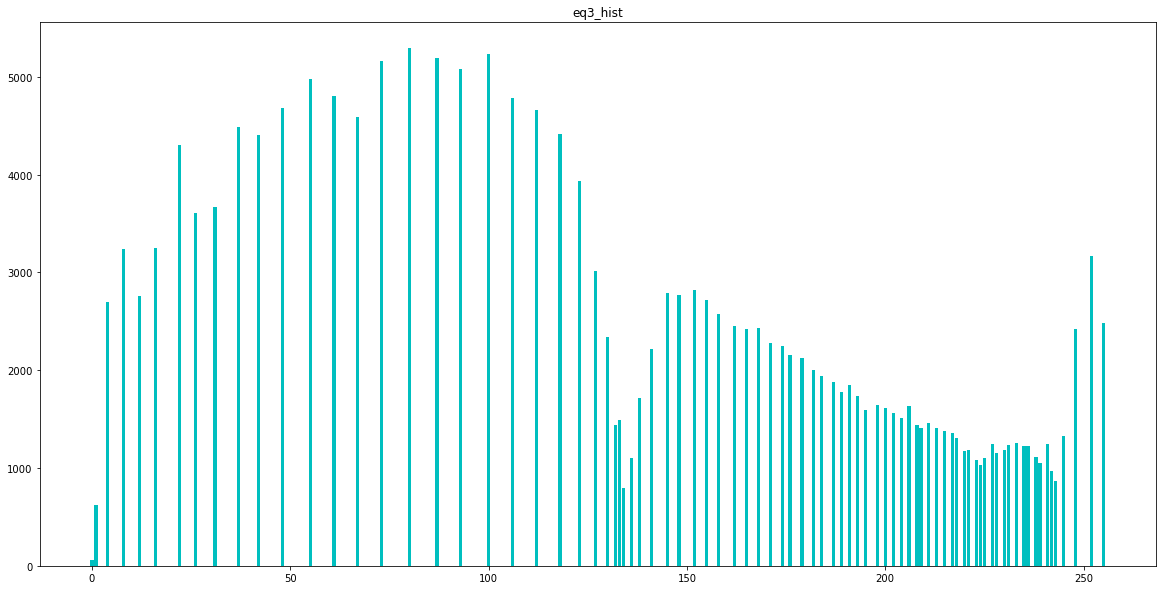

In [11]:
eq2 = histogram_equalization(img2)
eq3 = histogram_equalization(img3)
image_list = []
image_list.append([img2, 'img2'])
image_list.append([eq2, 'img2_equalized'])
plotter(image_list, 1, 2, True, 20, 10, 'q3d-2')
image_list = []
image_list.append([img3, 'img3'])
image_list.append([eq3, 'img3_equalized'])
plotter(image_list, 1, 2, True, 20, 10, 'q3d-3')
eqh2 = compute_histogram(eq2)
show_histogram(eqh2, 'eq2_hist', 'q3d-2-hist')
eqh3 = compute_histogram(eq3)
show_histogram(eqh3, 'eq3_hist', 'q3d-3-hist')

# PART 3E

Here is for your helper functions(optional)

use opencv clahe in this part

In [12]:
def clahe(image):
    '''
    Applys the OpenCV's CLAHE on the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The result image.   
    '''
    
    out_image = image.copy()
    
    ####### your code ########
   
#    The following two lines of code have been copy and pasted from the link in the assignment documentation with minor changes
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    out_image = clahe.apply(out_image)
    
    ##########################
    
    return out_image

Test your implementation (dont change this cell)

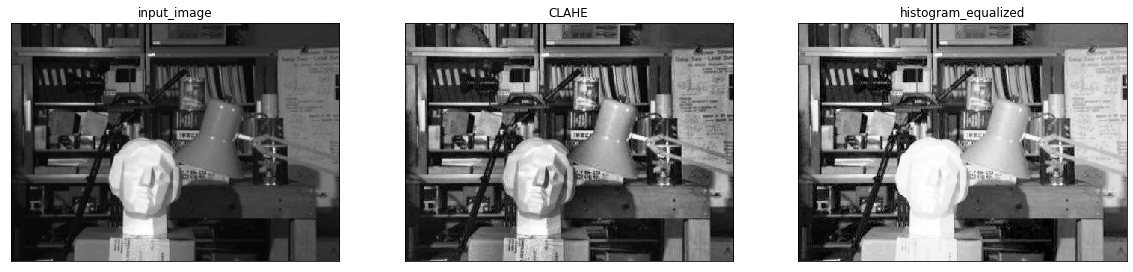

In [13]:
image = cv2.imread(os.path.join('images', 'img4.jpg'), cv2.IMREAD_GRAYSCALE)
clahed_img = clahe(image)
equlized_img = histogram_equalization(image)
image_list = []
image_list.append([image, 'input_image'])
image_list.append([clahed_img, 'CLAHE'])
image_list.append([equlized_img, 'histogram_equalized'])
plotter(image_list, 1, 3, True, 20, 10, 'q3e')

for create proper files for sending in quera run this cell.

In [14]:
!python notebook_converter.py

End. Have a good time!!